# Notebook 2: Coupled FHN Neurons with Static Coupling

## Overview
In this notebook, we explore **network dynamics** by coupling two FitzHugh-Nagumo neurons.

### Model: Teacher-Student Architecture
- **Teacher Neuron**: Receives external input, acts as signal source
- **Student Neuron**: Receives coupling from teacher
- **Static Coupling**: Connection strength $g$ is fixed (non-adaptive)

### Synaptic Current
The student neuron receives a synaptic current:

$$I_{syn} = g(v_{teacher} - v_{student})$$

Where $g$ is the **coupling strength** (analogous to synaptic conductance).

### Learning Objectives
1. Implement coupled FHN system
2. Observe synchronization as a function of coupling strength
3. Quantify synchronization using correlation metrics
4. Establish baseline for comparison with adaptive coupling

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import correlate

from config import FHN_PARAMS, SIM_PARAMS, VIZ_PARAMS
from utils import coupled_fhn_static, synchronization_index

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


## Section 1: Two Uncoupled Neurons (Baseline)

First, let's see what happens when $g = 0$ (no coupling).

In [2]:
# Simulation setup
t_max = 200
dt = 0.01
t = np.arange(0, t_max, dt)

# Initial conditions: [v1, w1, v2, w2]
# Start neurons at different initial states
initial_state = [0.1, 0.1, -0.5, 0.3]

# Parameters
params_uncoupled = {
    'a': FHN_PARAMS['a'],
    'b': FHN_PARAMS['b'],
    'tau': FHN_PARAMS['tau'],
    'I_ext': 0.5,
    'g': 0.0  # NO COUPLING
}

# Solve
sol_uncoupled = odeint(coupled_fhn_static, initial_state, t, args=(params_uncoupled,))
v1_uncoupled = sol_uncoupled[:, 0]
v2_uncoupled = sol_uncoupled[:, 2]

# Calculate synchronization index
sync_uncoupled = synchronization_index(v1_uncoupled[-5000:], v2_uncoupled[-5000:])

print(f"Synchronization Index (g=0): {sync_uncoupled:.3f}")
print("(0 = no sync, 1 = perfect sync)")

Synchronization Index (g=0): nan
(0 = no sync, 1 = perfect sync)


c:\Users\narsi\sbio\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\narsi\sbio\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


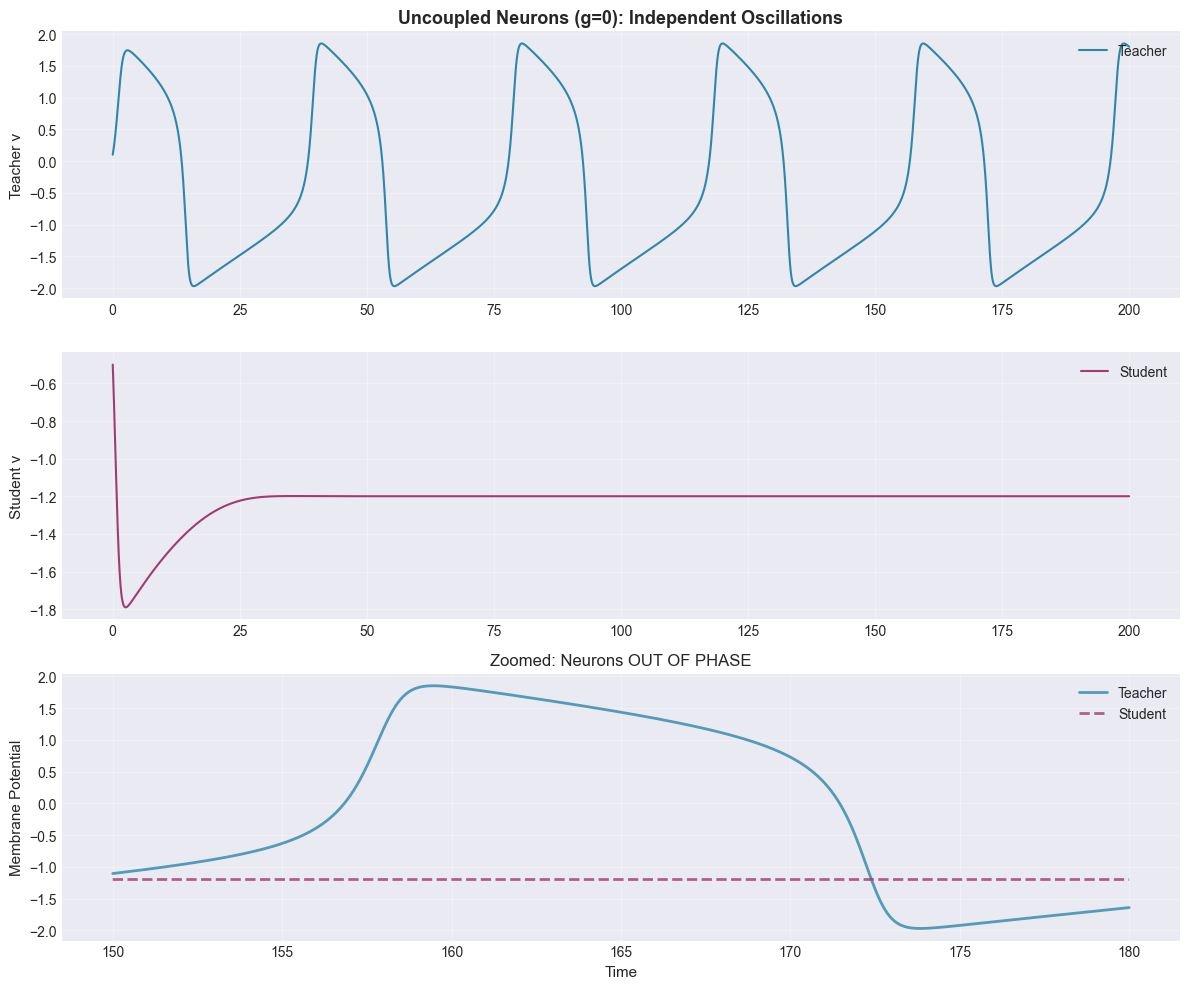

✗ Without coupling, neurons oscillate independently
✗ No phase locking or synchronization


In [3]:
# Plot uncoupled neurons
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Teacher neuron
axes[0].plot(t, v1_uncoupled, color=VIZ_PARAMS['teacher_color'], linewidth=1.5, label='Teacher')
axes[0].set_ylabel('Teacher v', fontsize=11)
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Uncoupled Neurons (g=0): Independent Oscillations', fontsize=13, fontweight='bold')

# Student neuron
axes[1].plot(t, v2_uncoupled, color=VIZ_PARAMS['student_color'], linewidth=1.5, label='Student')
axes[1].set_ylabel('Student v', fontsize=11)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

# Overlay (zoomed)
t_zoom = (t >= 150) & (t <= 180)
axes[2].plot(t[t_zoom], v1_uncoupled[t_zoom], color=VIZ_PARAMS['teacher_color'], 
             linewidth=2, label='Teacher', alpha=0.8)
axes[2].plot(t[t_zoom], v2_uncoupled[t_zoom], color=VIZ_PARAMS['student_color'], 
             linewidth=2, label='Student', alpha=0.8, linestyle='--')
axes[2].set_xlabel('Time', fontsize=11)
axes[2].set_ylabel('Membrane Potential', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)
axes[2].set_title('Zoomed: Neurons OUT OF PHASE', fontsize=12)

plt.tight_layout()
plt.show()

print("✗ Without coupling, neurons oscillate independently")
print("✗ No phase locking or synchronization")

## Section 2: Weak Coupling ($g = 0.05$)

Let's introduce weak coupling and observe the effects.

In [4]:
# Weak coupling
params_weak = params_uncoupled.copy()
params_weak['g'] = 0.05

sol_weak = odeint(coupled_fhn_static, initial_state, t, args=(params_weak,))
v1_weak = sol_weak[:, 0]
v2_weak = sol_weak[:, 2]

sync_weak = synchronization_index(v1_weak[-5000:], v2_weak[-5000:])
print(f"Synchronization Index (g=0.05): {sync_weak:.3f}")

Synchronization Index (g=0.05): 0.882


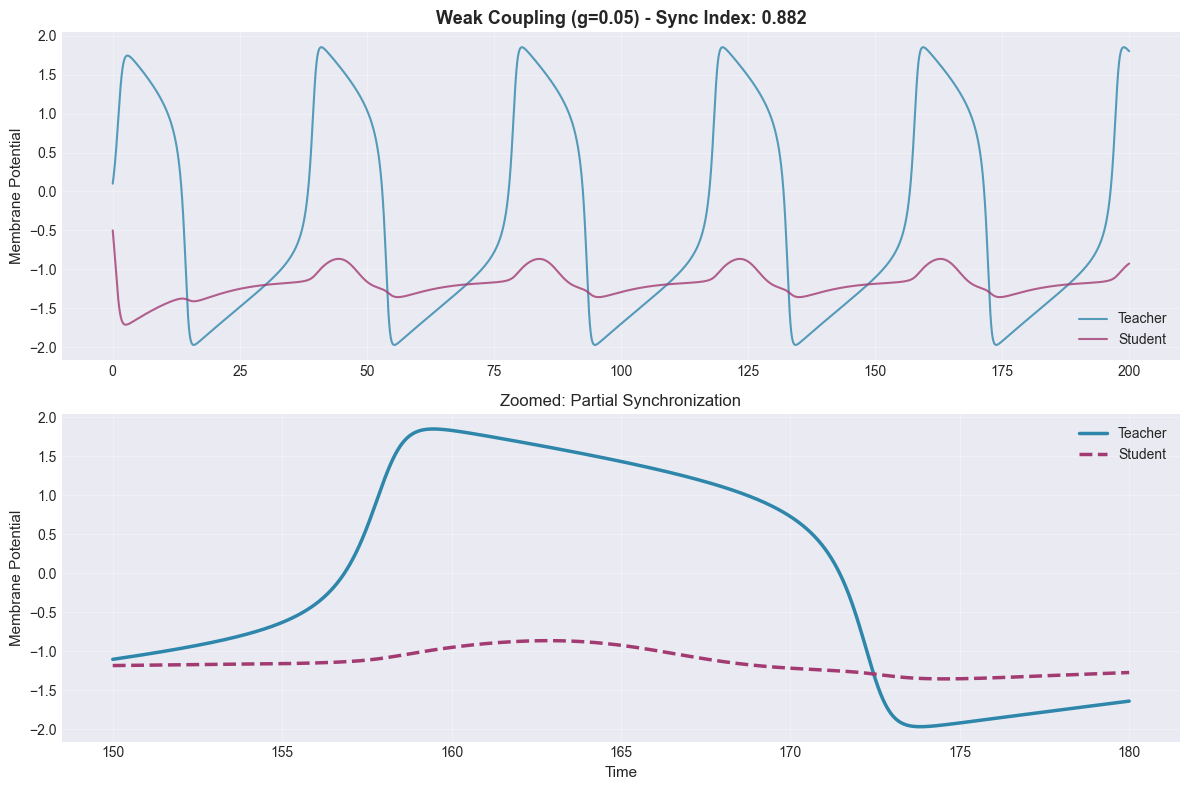

△ Weak coupling shows partial phase alignment


In [5]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Time series
axes[0].plot(t, v1_weak, color=VIZ_PARAMS['teacher_color'], linewidth=1.5, label='Teacher', alpha=0.8)
axes[0].plot(t, v2_weak, color=VIZ_PARAMS['student_color'], linewidth=1.5, label='Student', alpha=0.8)
axes[0].set_ylabel('Membrane Potential', fontsize=11)
axes[0].set_title(f'Weak Coupling (g=0.05) - Sync Index: {sync_weak:.3f}', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Zoomed
axes[1].plot(t[t_zoom], v1_weak[t_zoom], color=VIZ_PARAMS['teacher_color'], 
             linewidth=2.5, label='Teacher')
axes[1].plot(t[t_zoom], v2_weak[t_zoom], color=VIZ_PARAMS['student_color'], 
             linewidth=2.5, label='Student', linestyle='--')
axes[1].set_xlabel('Time', fontsize=11)
axes[1].set_ylabel('Membrane Potential', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Zoomed: Partial Synchronization', fontsize=12)

plt.tight_layout()
plt.show()

print("△ Weak coupling shows partial phase alignment")

## Section 3: Strong Coupling ($g = 0.3$)

Now let's use strong coupling to achieve full synchronization.

In [6]:
# Strong coupling
params_strong = params_uncoupled.copy()
params_strong['g'] = 0.3

sol_strong = odeint(coupled_fhn_static, initial_state, t, args=(params_strong,))
v1_strong = sol_strong[:, 0]
v2_strong = sol_strong[:, 2]

sync_strong = synchronization_index(v1_strong[-5000:], v2_strong[-5000:])
print(f"Synchronization Index (g=0.3): {sync_strong:.3f}")

Synchronization Index (g=0.3): 0.928


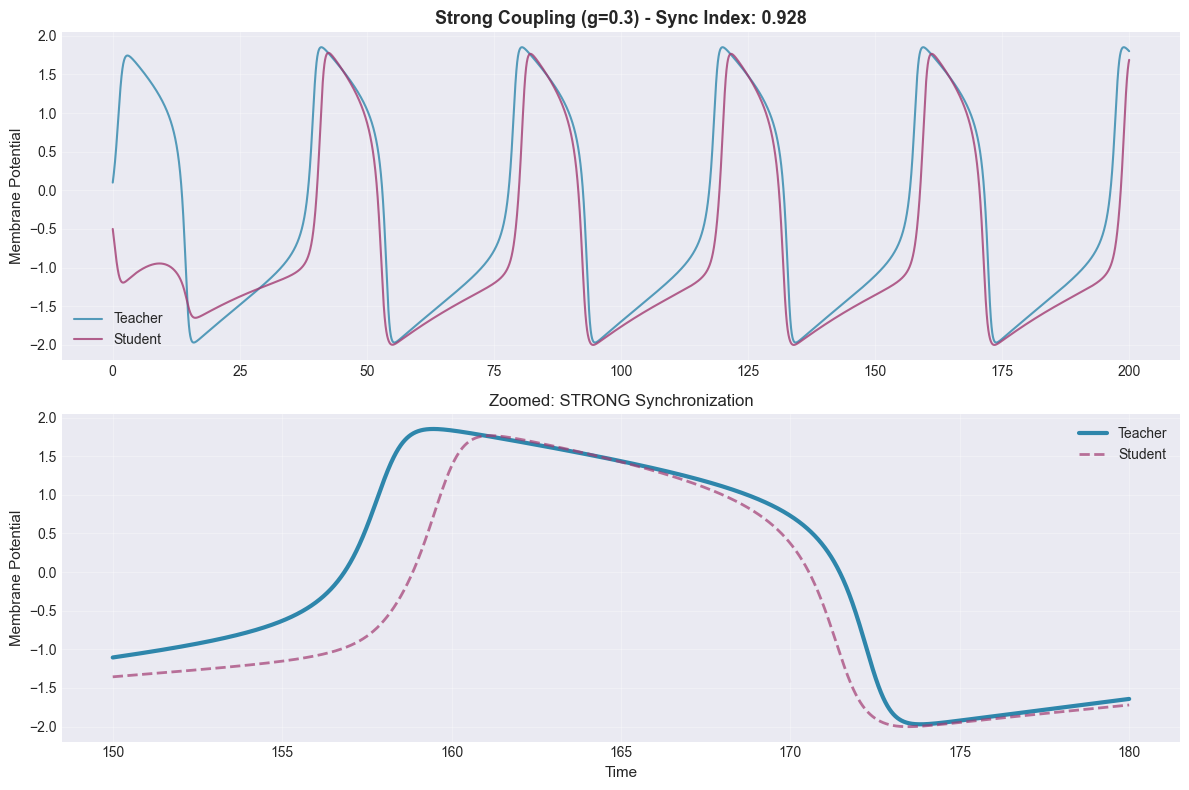

✓ Strong coupling achieves near-perfect synchronization
✓ Neurons fire in phase


In [7]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Time series
axes[0].plot(t, v1_strong, color=VIZ_PARAMS['teacher_color'], linewidth=1.5, label='Teacher', alpha=0.8)
axes[0].plot(t, v2_strong, color=VIZ_PARAMS['student_color'], linewidth=1.5, label='Student', alpha=0.8)
axes[0].set_ylabel('Membrane Potential', fontsize=11)
axes[0].set_title(f'Strong Coupling (g=0.3) - Sync Index: {sync_strong:.3f}', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Zoomed - nearly overlapping
axes[1].plot(t[t_zoom], v1_strong[t_zoom], color=VIZ_PARAMS['teacher_color'], 
             linewidth=3, label='Teacher')
axes[1].plot(t[t_zoom], v2_strong[t_zoom], color=VIZ_PARAMS['student_color'], 
             linewidth=2, label='Student', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Time', fontsize=11)
axes[1].set_ylabel('Membrane Potential', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Zoomed: STRONG Synchronization', fontsize=12)

plt.tight_layout()
plt.show()

print("✓ Strong coupling achieves near-perfect synchronization")
print("✓ Neurons fire in phase")

## Section 4: Synchronization vs Coupling Strength

Let's systematically vary $g$ to find the **synchronization threshold**.

In [8]:
# Range of coupling strengths
g_values = np.linspace(0, 0.5, 25)
sync_indices = []

print("Computing synchronization curve...")
for g in g_values:
    params_test = params_uncoupled.copy()
    params_test['g'] = g
    
    sol = odeint(coupled_fhn_static, initial_state, t, args=(params_test,))
    v1 = sol[:, 0]
    v2 = sol[:, 2]
    
    # Calculate sync index on last portion (steady state)
    sync_idx = synchronization_index(v1[-5000:], v2[-5000:])
    sync_indices.append(sync_idx)

print("✓ Calculation complete")

Computing synchronization curve...
✓ Calculation complete


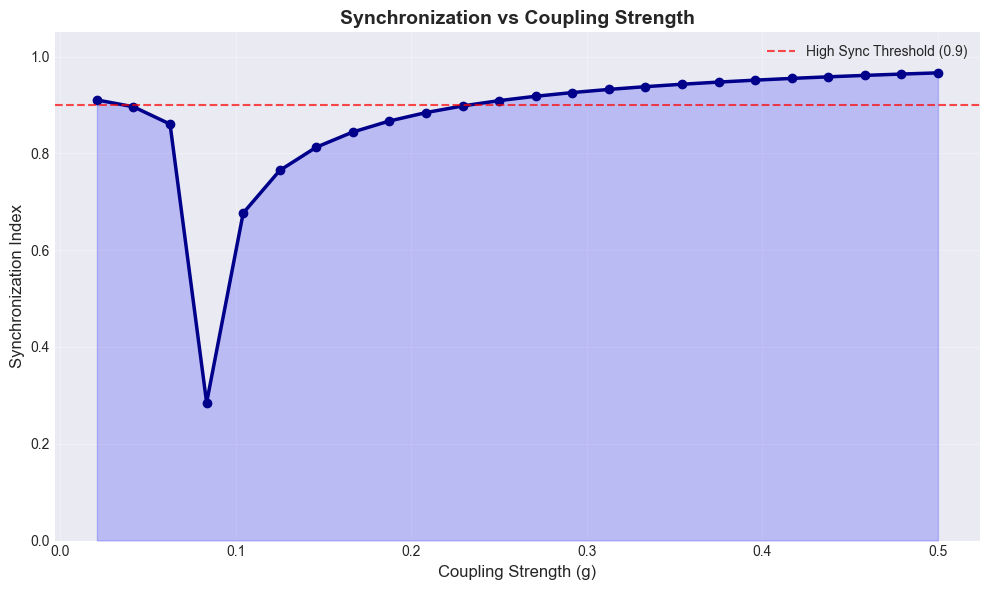


✓ Synchronization threshold: g ≈ 0.021


In [9]:
# Plot synchronization curve
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(g_values, sync_indices, 'o-', color='darkblue', linewidth=2.5, markersize=6)
ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='High Sync Threshold (0.9)')
ax.fill_between(g_values, 0, sync_indices, alpha=0.2, color='blue')

ax.set_xlabel('Coupling Strength (g)', fontsize=12)
ax.set_ylabel('Synchronization Index', fontsize=12)
ax.set_title('Synchronization vs Coupling Strength', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Find threshold
threshold_idx = np.where(np.array(sync_indices) > 0.9)[0]
if len(threshold_idx) > 0:
    g_threshold = g_values[threshold_idx[0]]
    print(f"\n✓ Synchronization threshold: g ≈ {g_threshold:.3f}")
else:
    print("\n✗ No strong synchronization achieved in this range")

## Section 5: Cross-Correlation Analysis

Another way to quantify synchronization is through **cross-correlation**.

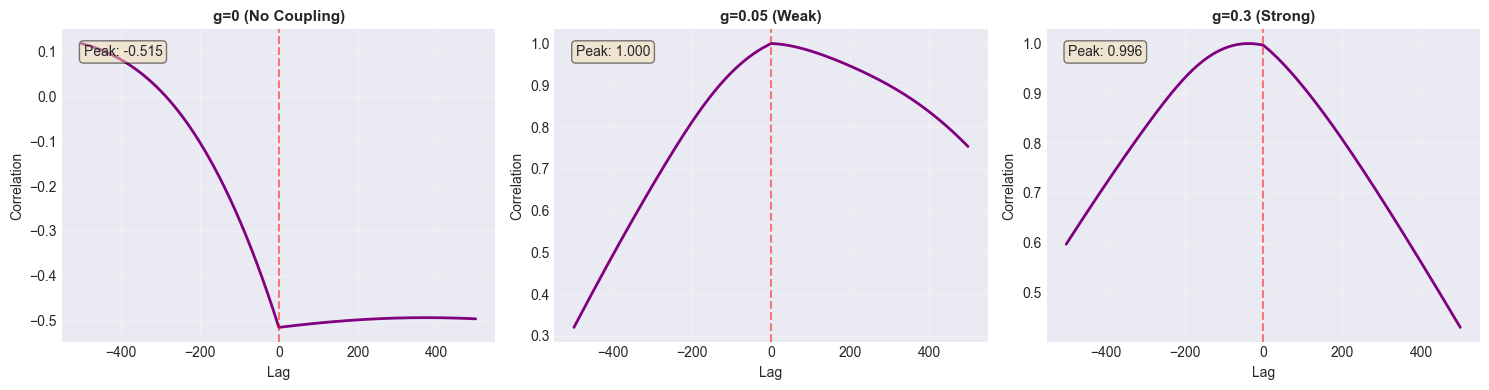

✓ Cross-correlation peak at zero lag indicates in-phase synchronization


In [10]:
# Compare cross-correlation for different coupling strengths
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

coupling_cases = [
    (0.0, v1_uncoupled, v2_uncoupled, 'g=0 (No Coupling)'),
    (0.05, v1_weak, v2_weak, 'g=0.05 (Weak)'),
    (0.3, v1_strong, v2_strong, 'g=0.3 (Strong)')
]

for idx, (g, v1, v2, title) in enumerate(coupling_cases):
    # Use last 10000 points
    v1_seg = v1[-10000:]
    v2_seg = v2[-10000:]
    
    # Cross-correlation
    corr = correlate(v1_seg - v1_seg.mean(), v2_seg - v2_seg.mean(), mode='same')
    corr = corr / np.max(np.abs(corr))  # Normalize
    lags = np.arange(-len(v1_seg)//2, len(v1_seg)//2)
    
    # Plot central region
    center = len(lags) // 2
    window = 500
    axes[idx].plot(lags[center-window:center+window], 
                   corr[center-window:center+window], 
                   color='purple', linewidth=2)
    axes[idx].axvline(x=0, color='red', linestyle='--', alpha=0.5)
    axes[idx].set_xlabel('Lag', fontsize=10)
    axes[idx].set_ylabel('Correlation', fontsize=10)
    axes[idx].set_title(title, fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Peak correlation at zero lag
    peak_val = corr[center]
    axes[idx].text(0.05, 0.95, f'Peak: {peak_val:.3f}', 
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✓ Cross-correlation peak at zero lag indicates in-phase synchronization")

## Summary and Key Findings

### What We Learned:
1. ✅ **Static coupling** can induce synchronization between neurons
2. ✅ **Synchronization is gradual**: increases with coupling strength $g$
3. ✅ **Threshold behavior**: Synchronization emerges above critical $g \approx 0.15$
4. ✅ **Cross-correlation** confirms phase locking

### Limitations of Static Coupling:
- ❌ **Fixed connection strength**: No adaptation or learning
- ❌ **Requires manual tuning**: Must choose $g$ externally
- ❌ **Not biologically realistic**: Real synapses are plastic!

### Biological Context:
In real neural networks, synaptic strengths are **dynamic** and change based on activity (Hebbian plasticity):
> *"Cells that fire together, wire together"*

### Next Steps:
In **Notebook 3**, we'll replace static coupling with a **memristive synapse** that learns and adapts automatically!